# Exercise 6.5

## 01 Importing Libraries and Data Set

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# Propt to display graphs in notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
path = r'/Users/Andreas/Desktop/28-02-2025 Chocolate Ratings Analysis/02 Data/Prepared Data'

In [6]:
CRA = pd.read_csv(os.path.join(path, 'flavours_of_cocoa_clean.csv'))

## 02 Elbow Technique

In [15]:
# Creating subset with only numerical columns
sub = CRA[['Cocoa (%)', 'Rating', 'Review Year', 'REF']]

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-542548844.7392253,
 -138732227.3039732,
 -62104443.40090297,
 -34701456.98771243,
 -22196351.661857024,
 -15644967.842290469,
 -11714750.771286678,
 -9001053.257331923,
 -7025251.692180883]

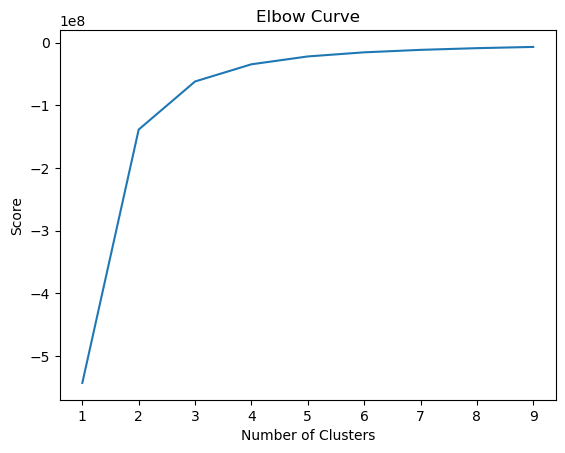

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Observation

I am going to use 3 clusters, There are two joints in this elbow chart 1st between 2 and 3 and the 2nd between 3 and 4 thus i chose to go with the 3 clusters as it can represnt both joints representatively. 

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [31]:
# Fit the k-means object to the data.

kmeans.fit(sub)

KMeans(n_clusters=3)

In [37]:
CRA['clusters'] = kmeans.fit_predict(sub)

In [40]:
CRA.head()

,Unnamed: 0,Manufacturer,Country of Manufacturer,Cocoa (%),Bean Origin (Country),Rating,Review Year,REF,clusters
0,0,A. Morin,France,63.0,Sao Tome,3.75,2016,1876,1
1,1,A. Morin,France,70.0,Togo,2.75,2015,1676,1
2,2,A. Morin,France,70.0,Togo,3.00,2015,1676,1
3,3,A. Morin,France,70.0,Togo,3.50,2015,1680,1
4,4,A. Morin,France,70.0,Peru,3.50,2015,1704,1


In [43]:
CRA['clusters'].value_counts()

clusters
1    654
2    609
0    512
Name: count, dtype: int64

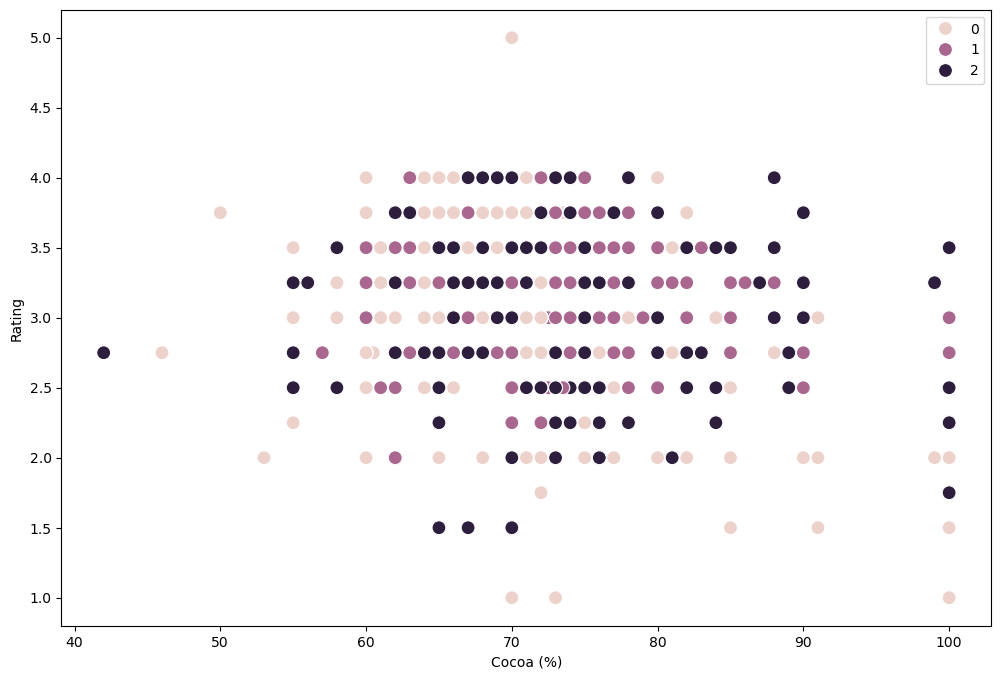

In [46]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=CRA['Cocoa (%)'], y=CRA['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa (%)') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

### Observations

the '0' cluster has both the highest and the lowest rated chocolates

the '1' cluster has no Cocoa (%) below 56 % and no rating below 2.0

the '2' cluster is the only cluster that ranges from 42% to 100% Cocoa (%) and has a lowest rating of 1.5


In [54]:
CRA.loc[CRA['clusters'] == 2, 'cluster'] = 'dark purple'
CRA.loc[CRA['clusters'] == 1, 'cluster'] = 'purple'
CRA.loc[CRA['clusters'] == 0, 'cluster'] = 'pink'

In [59]:
CRA.groupby('cluster').agg({'Cocoa (%)':['mean', 'median'], 
                         'Rating':['mean', 'median'], 
                         'Review Year':['mean', 'median'],
                          'REF':['mean', 'median']})

Cocoa (%)           Rating         Review Year          \
                  mean median      mean median         mean  median   
cluster                                                               
dark purple  71.881773   70.0  3.176519   3.25  2012.456486  2012.0   
pink         71.294922   70.0  3.120117   3.00  2008.453125  2009.0   
purple       71.866208   70.0  3.240826   3.25  2015.192661  2015.0   

                     REF          
                    mean  median  
cluster                           
dark purple   987.576355   991.0  
pink          332.550781   331.0  
purple       1623.408257  1618.0

### Observations 
It's hard to decypher this information without the using of the categorical variables as we can see the mean and median for our main variables (cocoa (%) and rating) are all very similar not creating much room development of hypothesis or answering questions. The geopgrahy of bean origin and manufacturing companies compared with ratings and cocoa % might give me a better understanding